In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
df = pd.read_csv('Downloads/2019 WinterData ScienceInternChallengeDataSet.csv')
df

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11
...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16
4997,4998,56,867,351,3,cash,2017-03-19 5:42:42
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18


In [3]:
df.dtypes

order_id           int64
shop_id            int64
user_id            int64
order_amount       int64
total_items        int64
payment_method    object
created_at        object
dtype: object

# ensuring no missing values exist

In [4]:
df.isnull().sum()

order_id          0
shop_id           0
user_id           0
order_amount      0
total_items       0
payment_method    0
created_at        0
dtype: int64

# ensuring the given data does not exceed 1 month

In [5]:
print('max registered date:', max(df['created_at']),'\n','min registered date:',min(df['created_at']) )

max registered date: 2017-03-30 9:55:00 
 min registered date: 2017-03-01 0:08:09


# mean order value (already calculated by shopify)

In [6]:
df['order_amount'].mean()

3145.128

# the extremely large sales associated to the top couple of stores distorts the average sales per store calculation. Do not use averaging for such a skewed distribution

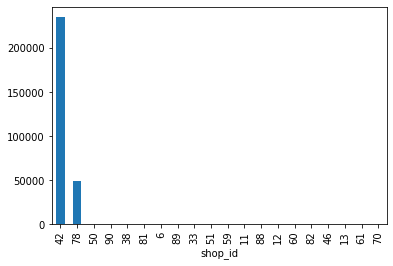

In [7]:
df.groupby('shop_id').mean()['order_amount'].sort_values(ascending=False).head(20).plot(kind='bar')

# alternatives to AOV: 1- I can use median insted of mean. 2-I can remove the outlier shops 3- I can remove the specific price tags that do not make sense

In [8]:
print('price median as an alternative to mean: ',df['order_amount'].median())

price median as an alternative to mean:  284.0


In [9]:
df_copy = df[(df['shop_id'] != 42) & (df['shop_id'] != 78)]

In [10]:
df_copy.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,4903.000000,4903.000000,4903.000000,4903.000000,4903.000000
mean,2499.584540,49.900877,849.858862,300.155823,1.995717
std,1444.221163,29.154367,86.887947,155.941112,0.982602
min,1.000000,1.000000,700.000000,90.000000,1.000000
25%,1246.500000,24.000000,776.000000,163.000000,1.000000
50%,2499.000000,50.000000,850.000000,284.000000,2.000000
75%,3750.500000,74.000000,925.000000,386.500000,3.000000
max,5000.000000,100.000000,999.000000,1086.000000,8.000000


In [11]:
#true average order value
print("removing outlier shops and taking mean:", df_copy['order_amount'].mean())

removing outlier shops and taking mean: 300.1558229655313


In [12]:
# "an affordable sneaker cannot be worth more than $1000"

df['price'] = df['order_amount']/df['total_items']
print("removing the unreasonable price tags: ",(df[(df['price'] < 1000)]).median()['order_amount'])

removing the unreasonable price tags:  284.0


# my proposed alternative metrics for per store analysis:

In [19]:
#a) weekly revenue per store
df = (df[(df['price'] < 1000)])
(df.groupby('shop_id').sum()['order_amount']/7).sort_values(ascending=False).head(10)

shop_id
42    1.712882e+06
89    3.304000e+03
81    3.236571e+03
6     3.232429e+03
13    3.108571e+03
59    3.076857e+03
71    3.045714e+03
19    2.934000e+03
70    2.891571e+03
84    2.885143e+03
Name: order_amount, dtype: float64

In [21]:
#b) weekly sneakers sold per store
df = (df[(df['price'] < 1000)])
(df.groupby('shop_id').sum()['total_items']/7).sort_values(ascending=False).head(10)

shop_id
42    4866.142857
13      19.428571
84      18.857143
53      18.571429
71      18.571429
81      18.285714
41      18.142857
24      18.000000
19      18.000000
14      17.285714
Name: total_items, dtype: float64

In [22]:
#c) customer diversificaton per store
df.groupby('shop_id').nunique()['user_id'].sort_values(ascending=False).head(10)

shop_id
71    62
53    60
19    60
9     56
70    56
89    56
13    56
69    55
81    54
59    54
Name: user_id, dtype: int64

# the last 3 blocks allow us to compare stores  from different angles. a) answers how much weekly bulk revenue per store was generated. b) answers how much weekly volume each store sells c) answers if customer base is large or not